In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
import zipfile
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Unzip the dataset
zip_path = '/content/BinaryClassifier.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/BinaryClassifier')

# Set folder paths
shirt_path = '/content/BinaryClassifier/Shirt'
tshirt_path = '/content/BinaryClassifier/TShirt'

# Image size
img_height, img_width = 255, 255

# Function to load images and labels
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = load_img(img_path, target_size=(img_height, img_width))
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(label)
        except:
            print(f"Could not load image: {img_path}")
    return images, labels

# Load images
shirt_images, shirt_labels = load_images_from_folder(shirt_path, Shirt)   # Shirt -> 0
tshirt_images, tshirt_labels = load_images_from_folder(tshirt_path, TShirt) # TShirt -> 1

# Combine data
X = np.array(shirt_images + tshirt_images, dtype='float32')
Y = np.array(shirt_labels + tshirt_labels).reshape(-1, 1)

# Normalize images
X /= 255.0

# Shuffle and split into train/test
X, Y = shuffle(X, Y, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (769, 255, 255, 3)
Y_train shape: (769, 1)
X_test shape: (193, 255, 255, 3)
Y_test shape: (193, 1)


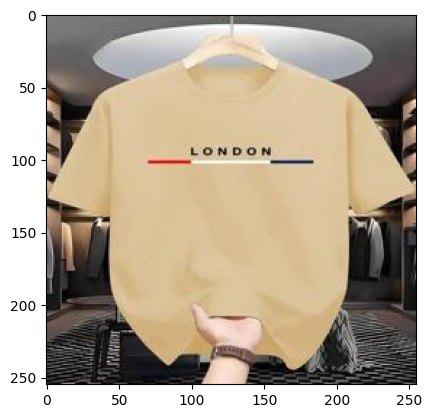

In [ ]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [ ]:
from tensorflow.keras import Input, Model
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
inputs = Input(shape=(255, 255, 3), name="input_layer")
# -------- Block 1 --------
b1_c1 = Conv2D(64, (3, 3), activation='relu', padding='same', name="block1_conv1")(inputs)
b1_c2 = Conv2D(64, (3, 3), activation='relu', padding='same', name="block1_conv2")(b1_c1)
b1_p  = MaxPooling2D((2, 2), strides=(2, 2), name="block1_pool")(b1_c2)
# -------- Block 2 --------
b2_c1 = Conv2D(128, (3, 3), activation='relu', padding='same', name="block2_conv1")(b1_p)
b2_c2 = Conv2D(128, (3, 3), activation='relu', padding='same', name="block2_conv2")(b2_c1)
b2_p  = MaxPooling2D((2, 2), strides=(2, 2), name="block2_pool")(b2_c2)

flat   = Flatten(name="flatten_layer")(b2_p)
fc1    = Dense(32, activation='relu', name="fc1")(flat)
fc2    = Dense(32, activation='relu', name="fc2")(fc1)
outputs = Dense(2, activation='softmax', name="output_layer")(fc2)
# -------- Model Definition --------
model = Model(inputs=inputs, outputs=outputs, name="vgg16_style_model")

In [ ]:
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, Y_test)  #
)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 599ms/step - accuracy: 0.8179 - loss: 0.3789 - val_accuracy: 0.8083 - val_loss: 0.4651
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 579ms/step - accuracy: 0.7588 - loss: 0.4732 - val_accuracy: 0.8238 - val_loss: 0.4520
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 584ms/step - accuracy: 0.8851 - loss: 0.3143 - val_accuracy: 0.8446 - val_loss: 0.3646
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 584ms/step - accuracy: 0.8804 - loss: 0.2860 - val_accuracy: 0.8705 - val_loss: 0.3191
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 598ms/step - accuracy: 0.9167 - loss: 0.2210 - val_accuracy: 0.9016 - val_loss: 0.2922
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 599ms/step - accuracy: 0.9323 - loss: 0.1786 - val_accuracy: 0.9016 - val_loss: 0.2889
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 597ms/step - accuracy: 0.9241 - loss: 0.1814 - val_accuracy: 0.8808 - val_loss: 0.2911
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 602ms/step - accuracy: 0.9277 - loss: 0.1619 - val_accuracy: 0.

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)

print(f"Test Loss     : {loss:.4f}")
print(f"Test Accuracy : {accuracy*100:.2f}%")


Test Loss     : 0.3030
Test Accuracy : 89.12%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


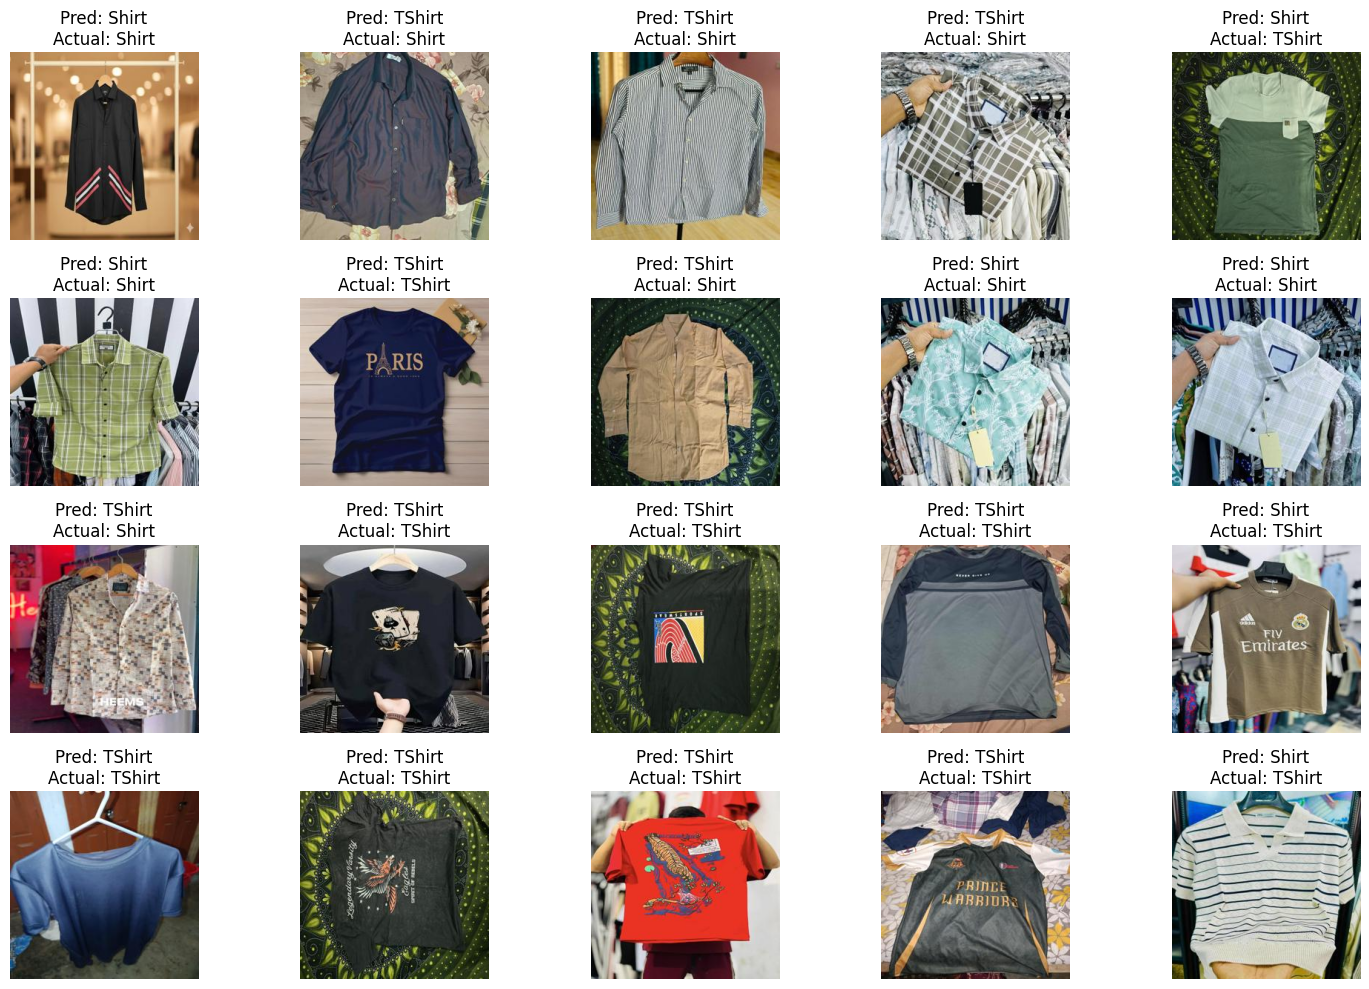

In [ ]:
# Take 20 random images from the test set
random_indices = random.sample(range(len(X_test)), 20)
X_sample = X_test[random_indices]
Y_sample = Y_test[random_indices]

# Predict the classes for the sample images
y_pred_sample = model.predict(X_sample)
y_pred_sample_classes = (y_pred_sample[:, 0] > 0.5).astype(int)

# Create a grid view to display the images and labels
plt.figure(figsize=(15, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_sample[i])
    plt.axis('off')
    predicted_label = 'Shirt' if y_pred_sample_classes[i] == 1 else 'TShirt'
    actual_label = 'Shirt' if Y_sample[i] == 0 else 'TShirt'
    plt.title(f"Pred: {predicted_label}\nActual: {actual_label}")

plt.tight_layout()
plt.show()

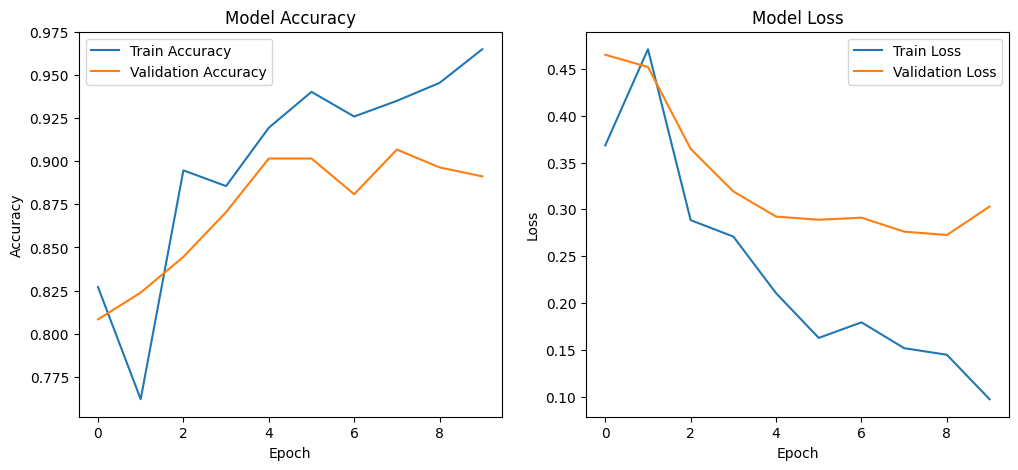

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
